In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf

Using PCA to form clusters of stocks having some sort of correlation in their returns and thus aiming to diversify the portfolio by choosing the stocks from different clusters.

In [ ]:
pip install nsepy

In [3]:
import nsepy as nse
import datetime
from datetime import date

Stocks chosen:
Morgan Stanley,
Bunge Global SA,
Microsoft,
Apple,
Tesla,
General Motors,
Ford Motors,
Boeing CO.,
Nike,
Fresh Del Monte Produce Inc

In [6]:
symbol = ['MS','BG','MSFT','AAPL','TSLA','GM','F','BA','NKE','FDP']
start = '2022-01-01'
end = '2023-01-01'
dataset = yf.download(symbol,start,end)

[*********************100%%**********************]  10 of 10 completed


In [8]:
df=dataset.Close
df = df.pct_change()
df

,AAPL,BA,BG,F,FDP,GM,MS,MSFT,NKE,TSLA
Date,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,-0.012692,0.027759,0.008750,0.116674,0.020246,0.074710,0.040623,-0.017147,0.010445,-0.041833
2022-01-05,-0.026600,-0.002621,-0.005924,-0.026738,0.014529,-0.045634,-0.024746,-0.038388,-0.024881,-0.053471
2022-01-06,-0.016693,-0.008119,0.022880,0.033812,-0.001397,0.002072,0.017112,-0.007902,-0.007458,-0.021523
2022-01-07,0.000988,0.019684,0.009363,-0.000818,0.016789,-0.009543,0.006092,0.000510,-0.025273,-0.035447
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.002798,0.004303,0.019051,0.004421,0.002301,0.008947,-0.003010,0.002267,-0.003941,-0.017551
2022-12-27,-0.013878,0.001798,0.016370,-0.014084,0.012247,-0.015075,-0.012194,-0.007414,0.011269,-0.114089
2022-12-28,-0.030685,-0.005385,-0.010738,-0.022321,-0.017391,-0.023710,-0.007054,-0.010255,-0.021946,0.033089


In [9]:
sd=df[1:]
sd.head()

,AAPL,BA,BG,F,FDP,GM,MS,MSFT,NKE,TSLA
Date,,,,,,,,,,
2022-01-04,-0.012692,0.027759,0.008750,0.116674,0.020246,0.074710,0.040623,-0.017147,0.010445,-0.041833
2022-01-05,-0.026600,-0.002621,-0.005924,-0.026738,0.014529,-0.045634,-0.024746,-0.038388,-0.024881,-0.053471
2022-01-06,-0.016693,-0.008119,0.022880,0.033812,-0.001397,0.002072,0.017112,-0.007902,-0.007458,-0.021523
2022-01-07,0.000988,0.019684,0.009363,-0.000818,0.016789,-0.009543,0.006092,0.000510,-0.025273,-0.035447
2022-01-10,0.000116,-0.028724,-0.009379,-0.024141,-0.020640,-0.019271,0.000769,0.000732,-0.041600,0.030342


In [10]:
from sklearn.decomposition import PCA

num_pc = 2


X = np.asarray(sd)
[n,m] = X.shape
pca = PCA(n_components=num_pc)
pca.fit(X)
percentage =  pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print('{0:.2f}% of the variance is explained by the first 2 PCs'.format(percentage_cum[-1]*100))

pca_components = pca.components_

70.32% of the variance is explained by the first 2 PCs


In [11]:
from sklearn.cluster import KMeans
cord=pca_components.T
data = np.array(cord)
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
labels = kmeans.labels_
clusters = {i: [] for i in range(5)}
for i in range(len(cord)):
    clusters[labels[i]].append(cord[i])
for cluster_num, points in clusters.items():
    print(f"Cluster {cluster_num + 1}: {points}")

Cluster 1: [array([0.33503532, 0.26137407]), array([0.39863772, 0.33893838]), array([0.37549879, 0.23498008])]
Cluster 2: [array([ 0.5071088 , -0.81519156])]
Cluster 3: [array([ 0.28588163, -0.04615025]), array([ 0.26591759, -0.01392893])]
Cluster 4: [array([0.11204461, 0.13513853]), array([0.09363884, 0.15346873])]
Cluster 5: [array([0.23506316, 0.16531801]), array([0.31884674, 0.15994523])]


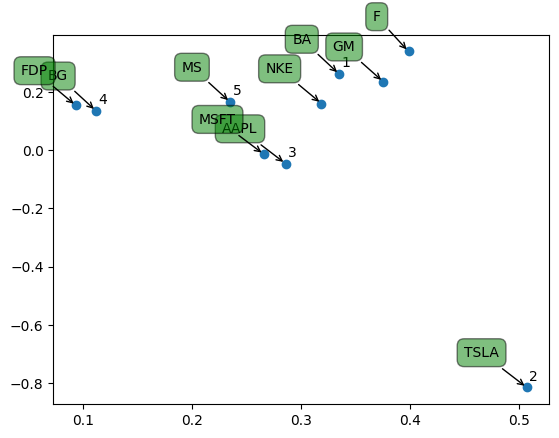

In [14]:
plt.scatter(data[:, 0], data[:, 1])
for cluster_num, points in clusters.items():
    plt.annotate(cluster_num+1, (points[0][0], points[0][1]), textcoords="offset points", xytext=(5,5), ha='center')
labels = sd.columns
for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    );